# **A Guide for original Soul 45 record collectors**

 <div align="justify">
 
 Vinyl records have made a remarkable comeback in recent years with auctions reaching astonishing amounts and with more and more people chasing for long hours after their much craved, rare and envied 45s or LPs. The resurgence of vinyl has led to a renewed interest in record collecting and this revival has significantly impacted the music industry. But how can simple music lovers learn to give a likely value to the records they own or they wish to purchase?

 A combination of factors can make a given record valuable. Some are easily accessible for knowledgable people, some can be evinced from careful and persistent observation and other inputs come from pure taste and, especially from a djs' point of view, from the knowledge of the public and the other aficionados.  My work, here, focuses on trying to discover the underlying trend that has shaped the price of a sample of 100 commonly sought after records between 2015 and 2020 and, in order to achieve a reliable and plausible basis for prediction, I rely on the four firm parameters available to all connoisseurs, namely *Vinyl Scarcity*, *Record condition*, *Genre* and *Auction Results*. The expected result is to provide an overview of the current situation that may represent a valid starting point and a mean to identify the fifth and most unpredictable factor: how much each piece of vinyl is currently IN DEMAND. Only when all these parameters are clear enough, potential buyers or sellers may aspire to set a realistic price to their collection or wanted records.

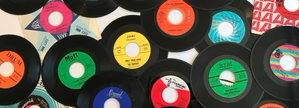

 </div>

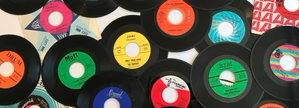
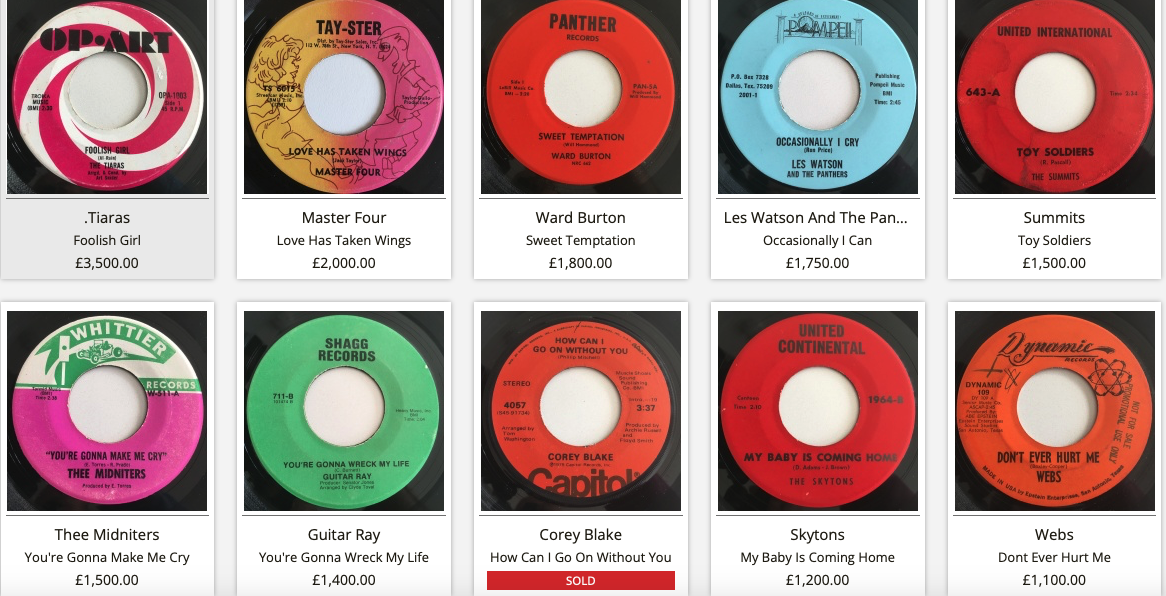

 <div align="justify">

<div center>

### Soul 45 Records Price References (2015)

</div>

My first step is to create a grid of parameters that constitute the *Soul 45 Records Price Reference for 2015* made of 3 independent variables: **Theoretical Price according to Vinyl Scarcity (2015)**; **Record condition** and **Genre**. These factors are the coordinates that produce 100 auctions results that will represent some of the most commonly purchased records for the years 2015, 2016, 2017, 2018 and 2019. The resulting trends will serve for an updated guide and new parameters.

- **Python Libraries imported**

he three Python libraries imported for this purpose are **Pandas** the **random** module and **Matplotlib**. *Pandas* is the popular library on which my data analysis is based and that allows a very straight-forward and powerful data manipulation. In this task, I was guided by the very precious help of [Pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) which is a manual providing simple and understandable instructions for whatever data operation one may intend to perform. The *random* module, is here used in for basic random number generation and my point of reference for this purpose is [W3Schools](https://www.w3schools.com/python/module_random.asp). Finally, *Matplotlib* is a powerful Python library that allows you to create high-quality visualisations such as graphs, charts, and plots, making it easier to communicate and interpret data. In this case, I have referred to its official documentation that can be found [www.matplotlib.org](https://matplotlib.org/stable/users/explain/quick_start.html).


 </div>

In [26]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings

 <div align="justify">
 
 ### Parameters grid: "**vinyl scarcity 2015**; "**record conditions multiplier**"; "**genre**".**

To start off, I have defined my first variable, *vinyl_scarcity_2015*, that for its classes can be considered **categorical** but for its individual price and copies ranges can be considered **continuous**. Its value, in fact, does not fit neatly into either the *categorical* or *continuous* data type. If we consider its content as whole, the data display 5 different categories and this is why this variable can be regarded as *categorical*, but, however, each of these categories is *continuous* as the measures contained can be isolated with a high level of precision and can theoretically have an infinite number of possible values. The scarcity for vinyl records bands and their corresponding prices are distributed as follows:

1. $20 - $200 (from 100,000 to 90,819 copies)
2. $201 - $400 (from 90,818 to 50,456 copies)
3. $401 - $1000 (from 50,455 to 10,092 copies)
4. $1001 - $1800 (from 10,091 to 20,181 copies)
5. $1801 - $3000 (from 100 to 10,090 copies)

With the structure of information given, the most suitable manner to orderly store and relate each range into a variable is creating five *tuples* inside a *list*: this technique is called **nesting**.

*Tuples* have the advantage of preserving the order of the data, which is important when the price ranges and their corresponding copy quantities need to maintain a specific disposition. Additionally, being the tuples immutable, these groups will then remain unaltered when manipulating the other parameters. All the *vinyl_scarcity_ranges* variable content can then be accessed in its entirety by simply calling its name followed by [0], or partially by indicating the number of the wanted tuple inside squared brackets, i.e. [1] $\rightarrow$ OUTPUT: (90818, 50456, 201, 400). For the **nesting** usage, I have mainly referred to [Java Exsecise](https://www.javaexercise.com/python/python-nested-tuples).


 </div>


In [3]:
# Define vinyl scarcity ranges and their corresponding price parameters.
vinyl_scarcity_ranges = [
    (100000, 90819, 20, 200),
    (90818, 50456, 201, 400),
    (50455, 10092, 401, 1000),
    (10091, 20181, 1001, 1800),
    (100, 10090, 1801, 3000)
]



 <div align="justify">

The second categorical variable is called *record condition multiplier* and represents factors used to multiply the base price of each record according to its condition. Due to the manner of how the information are disposed, I have ordered the elements composing its content as a **dictionary**, where each record condition represents a **key**, or an index, and its associated multiplier as a **value**. In Python a **dictionary** is a data structure utilised to store and retrieve values using keys or vice versa: in my case *Poor*, *Good*, *Very Good*, *Very Good++* and *Near Mint* are associated with *0.050*, *0.075*, *1.010*, *1.20* and *1.30* respectively.

These 5 multipliers factors are: 

Poor = 0.050 multiplier
Good = 0.075 multiplier
Very Good = 1.010 multiplier
Very Good ++ = 1.20 multiplier
Near Mint = 1.30 multiplier


Dictionaries are wrapped in curly braces {} and their pairs keys-values are separated by colons. My source reference for the dictionaries' usage is [Real Python](https://realpython.com/python-dicts/).

 </div>


In [4]:
# Define record condition multipliers.
condition_multipliers = {
    'Poor': 0.050,
    'Good': 0.075,
    'Very Good': 1.010,
    'Very Good ++': 1.20,
    'Near Mint': 1.30
}

 <div align="justify">

My last parameter is another categorical variable called *genre* and is shaped as a *dictionary* in the same fashion of the *condition multiplier* variable. Below, the information contained:

Motown = 0.85 multiplier
Northern Soul = 1.30 multiplier

 </div>

In [5]:
# Define genre multipliers.
genre_multipliers = {
    'Motown': 0.85,
    'Northern Soul': 1.30
}

 <div align="justify">

### **The "**price**" variable, random elements generation and "**all records**” dataset**


The next passage consists in generating 100 random records' prices and this operation must be performed for five consecutive years. I have, thus, declared another variable called "**years**" with the new dataset indices- **2015**, **2016**, **2017**, **2018** and **2019**- and then structured a *for* loop in a *range* of *20* elements per each of the *5 price ranges* for a total of 100 records per year. Their prices are set with the usage of the 3 parameters that are purposely randomised with the **random** method according to their individual characteristics.

However, as already discussed, since the *vinyl scarcity ranges* variable is to be randomised in its *continuous part*, the values in the ranges must be separated from the *categorical* part of the variable, the rate bands that will remain unchanged. This can be obtained by **unpacking** the tuples in the *vinyl scarcity ranges* so as to set the two limits of each range and generate random values. This procedure was deployed following the indications found in [Unpacking a Tuple in Python - GeeksforGeeks](https://www.geeksforgeeks.org/unpacking-a-tuple-in-python/).

I have consequently named the following variables and passed them as values to a new variable called "*scarcity_range*": **min_copies, max_copies, min_price, max_price** so as the *for* loop can iterate over *vinyl_scarcity_ranges* using the **enumerate** function. In this way, it is possible to iterate simultaneously over both the elements and their indices both accessing the values and also keeping track of their index position in a sequence.  In each iteration, the current value is assigned to a *scarcity_range* category, and the corresponding index position is assigned to *i*.  

After having built the 5 indices for each list, the loop *for year in years* iterates over the *years* list to process records for each year separately. The line *num_records = 20 // (len(condition_multipliers) * len(genre_multipliers))* calculates the number of records to be generated for each condition and genre in each range and it uses the **len()** function to get the length of the *condition_multipliers* and *genre_multipliers* lists: the **len()** function returns the number of elements in a list. $\Rightarrow$ **At this point, the main structure of the list is implemented and passed to the *all_records = []* empty list.**

**PRICES VARIABLE**. The creation of the auctions’ results list is based on three loops that perform the same operation for every combination of elements: the *condition* and *genre* parameters applied to every random number generated from the price ranges. The first and outer loop, *for condition in condition_multipliers*, iterates over the *condition_multipliers* list allowing the code to generate records for each condition multiplier, while the second and middle loop, *for genre in genre_multipliers*, iterates over the *genre_multipliers* variable to generate records for each genre multiplier. The last and innermost loop, *for _ in range(num_records):* iterates over all the prices for the number of times specified in the variable *num_records*. The *_* is used as a convention when the loop variable is not needed or when the variable is already used within the loop. The *range()* method here generates a sequence of numbers starting from 0 up to (but not including) the *num_records* (100 in my case).

**PRICES GENERATION AND RANDOM METHOD USAGE**. The final prices are finally calculated applying the **random.uniform** to the **continuous part** of the *vinyl scarcity range* variable and by multiplying its results to the *conditions* and *genre* factors. Setting a **seed** for a random number generator is a way to ensure reproducibility of the random process and determines the initial state of the random number generator. Starting with the same seed will ,in fact, result in the same sequence of random numbers and the choice of the seed value, **42** in my case, is arbitrary and has no inherent significance. The list of values are, hence, randomly generated within each of the five ranges of the *vinyl scarcity ranges* variable delimitated by their *min_price* and *max_price* and since this operation consists in generating a float in a range where all values have the same probability to be generated the *random.uniform* is the method selected. 


</div>

In [6]:
# Set a random seed for reproducibility.
random.seed(42)

# Create an empty list to store all records.
all_records = []

# Forming a list of 5 consecutive years
years = 2015, 2016, 2017, 2018, 2019

# Repeat the process for each vinyl scarcity range.
for i, scarcity_range in enumerate(vinyl_scarcity_ranges):

    min_copies, max_copies, min_price, max_price = scarcity_range

    # Repeat the process for each year.
    for year in years:
        # Calculate the number of records to generate for each condition and genre in each range.
        num_records = 20 // (len(condition_multipliers) * len(genre_multipliers))

        records_for_year = []

        for condition in condition_multipliers:
            for genre in genre_multipliers:
                for _ in range(num_records):
                    # Calculate the price based on selected parameters and round to two decimal places.
                    price = round(random.uniform(min_price, max_price) * condition_multipliers[condition] * genre_multipliers[genre], 2)

                    # Append details to the list for the current year.
                    records_for_year.append({
                        "Year": year,
                        "Vinyl Scarcity Range": f"${min_price} - ${max_price} ({min_copies} to {max_copies} copies)",
                        "Record Condition": condition,
                        "Genre": genre,
                        "Price": f"${price:.2f}"  # Display the price in dollars.
                    })

        # Append records for the current year to the overall list.
        all_records.extend(records_for_year)

# Create a DataFrame from the list of all records.
all_records_df = pd.DataFrame(all_records)

# Specify the folder name
folder_name = 'data'

# Save the DataFrame as a CSV file in the 'data' folder.
csv_file_path = os.path.join(folder_name, 'Auction_Results_15_19.csv')
all_records_df.to_csv(csv_file_path, index=False)

# Print the path to the saved file
print(f"CSV file saved at: {csv_file_path}")

CSV file saved at: data/Auction_Results_15_19.csv


 <div align="justify">

### Data set overview

This brief overview starts with a meaningful synthesis of the *Auction Results 15-19* data set. First, I have extracted the *sum* of the amount of prices reached by the same 100 records for each year considered and, then, I have found the *mean*, the *std*, *min* and *maximum* of all prices.  To add all the prices together, the method used is the Pandas' **.sum()** function that performs element-wise addition across the specified axis. The other results are obtained through the **.mean()**, the **.std()**, the **.min()** and the **.max()** Pandas' functions.

In order to convert prices into purely numerical values, we need first to remove the dollar sign from each value in the *Price* column and convert the updated values to *float*. The problem with the dollar sign is that, when performing calculations, it can cause errors and we must, therefore, strip away the currency symbol and leave only the numerical value. In order to achieve this, I have applied the following two functions:

 - The **.str()** function in Pandas uses the **.replace()** method to remove the dollar sign from a string. The first argument, **$**, specifies the character or string to be replaced, and the second argument, **’’**, represents an empty string, meaning the dollar sign will be effectively removed.

 * The **.astype(float)** function that converts the values in the "Price" column to a numerical data type, specifically *float*. In fact, by default, the interpreter treats the values of a column as strings storing them as such under the *Price* index. The **.astype()** method allows us to change their data type so as to convert the values from strings to floating-point numbers so that mathematical operations can be performed on them.

To progress towards a meaningful representation of the results contained by the data set, it is crucial to **group** the records into easy to analyse portions. Pandas' **.groupby()** function is the tool through which this operation can be easily performed allowing a data manipulation that isolates single columns from the rest of the data set, applies a specific criterion or attribute or creates *subsets of data* to examine. To use **.groupby()**, the column or columns that are to be grouped by must be passed as arguments. For example, in case of a data set with an hypothetical index called *Column*, the **df.groupby(‘Column’)** command will group the DataFrame **df** based according to their unique and specific  values in the *Column* column and this operation can be performed also with a list of column names, such as **df.groupby([‘Column1’,’Column2’])**.

 </div>

In [39]:
# Load the CSV file into a DataFrame.
csv_file_path = 'data/Auction_Results_15_19.csv'
all_records_df = pd.read_csv(csv_file_path)

# Suppress the FutureWarning for the specific code block
warnings.filterwarnings("ignore", category=FutureWarning)

# Convert the "Price" column to numeric type.
all_records_df['Price'] = all_records_df['Price'].str.replace('$', '').astype(float)

# Group the records by "Year" and calculate the sum of "Price".
total_spent_by_year = all_records_df.groupby('Year')['Price'].sum()

# Print the total spent for each year with dollar sign.
for year, total_spent in total_spent_by_year.items():
    print(f"Year: {year} - Total Spent: ${total_spent:.2f}")

Year: 2015 - Total Spent: $77010.34
Year: 2016 - Total Spent: $77452.31
Year: 2017 - Total Spent: $78233.79
Year: 2018 - Total Spent: $77379.77
Year: 2019 - Total Spent: $73864.17


In [16]:
# Calculate the mean, standard deviation, minimum, and maximum values of prices.
price_mean = all_records_df['Price'].mean()
price_std = all_records_df['Price'].std()
price_min = all_records_df['Price'].min()
price_max = all_records_df['Price'].max()

# Print the results.
print(f"Mean Price: ${price_mean:.2f}")
print(f"Standard Deviation of Prices: {price_std:.2f}")
print(f"Minimum Price: ${price_min:.2f}")
print(f"Maximum Price: ${price_max:.2f}")

Mean Price: $767.88
Standard Deviation of Prices: 1055.06
Minimum Price: $1.04
Maximum Price: $4779.69


<div align="justify">

### Preprocessing the data set

Before proceeding to my actual analysis, I have *preprocessed* the data contained in the *Auction Results 15-19* data set. This standard procedure is used to remove missing or inconsistent data values resulting from human or computer error. *Preprocessing data* can significantly improve the accuracy and quality of a dataset, making it more reliable. Once the data are confirmed as consistent and all unhelpful parts are eliminated, the information can be transformed into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks. 

</div>

In [17]:
# Preprocessing the data set.
print(all_records_df.isnull().sum())

Year                    0
Vinyl Scarcity Range    0
Record Condition        0
Genre                   0
Price                   0
dtype: int64


 <div align="justify">

### Data set analysis

My analysis starts by restricting the fields of examination. In order to have a clear pattern of the trends that shapes the sale of a sample of records during the years 2015, 2016, 2017, 2018 and 2019, I focus on the items that are in the best possible condition so as to reach a generalisation easier to analyse. For this purpose, my first step is creating a smaller list of records in *Near Mint* conditions, grouped by year and genre and, finally, count them all.   

The **size()** function is here applied after grouping the records per years and genre and it is used to determine the number of records in the condition indicated in each group, and then the **.reset_index()** function is utilised to represent this information in a tabular format, namely as a *DataFrame* that displays the *Year*, the *Genre*, and the *Count* columns. In other words, the **.size** function creates a new *series of objects**, the added records, and the **.reset_index** creates another group in the index. The result is a new data set that keeps the counts associated with their respective groups.

 </div>

In [28]:
# Filter the records based on the condition.
condition_records_df = all_records_df[all_records_df["Record Condition"] == "Near Mint"]
# Group the records by year and genre and count them.
grouped_df = condition_records_df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# Print the grouped records.
print(grouped_df)

   Year          Genre  Count
0  2015         Motown     10
1  2015  Northern Soul     10
2  2016         Motown     10
3  2016  Northern Soul     10
4  2017         Motown     10
5  2017  Northern Soul     10
6  2018         Motown     10
7  2018  Northern Soul     10
8  2019         Motown     10
9  2019  Northern Soul     10


 <div align="justify">

From the above visualisation, it appears that the data set contains 10 *Near Mint* *Northern Soul* records and 10 *Motown* records per year. As shown below, this subplot can be further filtered grouping the *near mint* records into each of the 5 categories of the **Vinyl Scarcity Range**. The two categories selected, the specific *record condition* and *vinyl scarcity range*, are treated as boolean conditions that, once combined, are passed as an argument to the **.loc** function of the *all_records_df* DataFrame  to isolate and filter the desired records.  

The **.loc** function syntax follows this pattern: *dataframevalue.loc[rows,columns]*. My main point of reference for its usage is [Codecademy](https://www.codecademy.com/resources/docs/pandas/dataframe/loc).

Finally, the **& operator** combines the two conditions and acts as a logical AND operator, ensuring that the rows of the items are *Near Mint* under the *Record Condition* column and belong to the *Vinyl Scarcity Range* indicated. The new variable is, then, called *filtered_records*.


</div>

In [29]:
# Filter the DataFrame to isolate records in near mint condition in the specified range.
filtered_records = all_records_df.loc[
    (all_records_df['Record Condition'] == 'Near Mint') &
    (all_records_df['Vinyl Scarcity Range'] == '$1801 - $3000 (100 to 10090 copies)')
]

# Display the prices and genres of the filtered records.
print(filtered_records[['Price', 'Genre', 'Year']])

       Price          Genre  Year
416  2314.50         Motown  2015
417  2619.61         Motown  2015
418  4765.52  Northern Soul  2015
419  3191.26  Northern Soul  2015
436  2320.27         Motown  2016
437  3114.06         Motown  2016
438  3968.62  Northern Soul  2016
439  4667.61  Northern Soul  2016
456  3004.73         Motown  2017
457  2680.77         Motown  2017
458  4313.68  Northern Soul  2017
459  3600.11  Northern Soul  2017
476  2763.95         Motown  2018
477  2911.60         Motown  2018
478  4779.69  Northern Soul  2018
479  4595.02  Northern Soul  2018
496  2525.78         Motown  2019
497  2208.77         Motown  2019
498  3990.77  Northern Soul  2019
499  3302.30  Northern Soul  2019


 <div align="justify">

In order to clearly compare the different selling trends over the 5 years examined,  I have distinguished the two theoretical records identifying each genre as *Record A*, *Record B*, *Record C* and *Record D*. The first operation is adding another column called *Record Label* and then populate its rows with the string values *Record A* and *Record B* for the *Northern Soul* genre and *Record C* and *Record D* for the *Motown* genre. **New columns can be created with the usage of squared brackets** and, in this case,  as indicated by the empty quotation marks *””*, it is initially empty as it would be an empty list. The new variable *record_labels* is then created as a column containing a dictionary wrapped into *curly brackets*. The rows content is made of one of the two values of the dictionary, *Record A* or *Record B* and *Record C* and *Record D*, per each the two keys, the two genres *Motown* and *Northern Soul* .  

This *dictionary* is then iterated over its key-value pairs using the **.item()** method to associate the pairs genres-labels- namely keys and values - to a singular *Year* with the **.unique()** method. In this manner, one year includes two genres and each genres two records.  

The following loop uses the **len** function to determine the number of records for a specific year, stores this information in the *num_records* variable, and then **slices** the labels list to match this number. Finally, the **.loc** function, together with the **.index** method, is implemented to assign the labels to the correct rows under the *Record Label* column of the *filtered_records* DataFrame. This process is repeated for each genre and each unique year within that genre.  

This new column and its corresponding content has been developed following the instructions found in [Built In](https://builtin.com/data-science/pandas-add-column).

 </div>

In [31]:
# Add a new column for labeling records.
filtered_records = filtered_records.copy()
filtered_records['Record Label'] = ""

# Create a dictionary to keep track of record labels.
record_labels = {'Northern Soul': ['Record A', 'Record B'], 'Motown': ['Record C', 'Record D']}

# Iterate through the filtered records and assign record labels.
for genre, labels in record_labels.items():
  genre_records = filtered_records[filtered_records['Genre'] == genre]
  years = genre_records['Year'].unique()
  for year in years:
    year_records = genre_records[genre_records['Year'] == year]
    num_records = len(year_records)
    labels_per_year = labels[:num_records]
    filtered_records.loc[year_records.index, 'Record Label'] = labels_per_year

# Display the prices, genres, years, and record labels of the filtered records.
print(filtered_records[['Price', 'Genre', 'Year', 'Record Label']])

       Price          Genre  Year Record Label
416  2314.50         Motown  2015     Record C
417  2619.61         Motown  2015     Record D
418  4765.52  Northern Soul  2015     Record A
419  3191.26  Northern Soul  2015     Record B
436  2320.27         Motown  2016     Record C
437  3114.06         Motown  2016     Record D
438  3968.62  Northern Soul  2016     Record A
439  4667.61  Northern Soul  2016     Record B
456  3004.73         Motown  2017     Record C
457  2680.77         Motown  2017     Record D
458  4313.68  Northern Soul  2017     Record A
459  3600.11  Northern Soul  2017     Record B
476  2763.95         Motown  2018     Record C
477  2911.60         Motown  2018     Record D
478  4779.69  Northern Soul  2018     Record A
479  4595.02  Northern Soul  2018     Record B
496  2525.78         Motown  2019     Record C
497  2208.77         Motown  2019     Record D
498  3990.77  Northern Soul  2019     Record A
499  3302.30  Northern Soul  2019     Record B


 <div align="justify">

 ### The IN DEMAND factor visually represented
 
To display the values of *Northern Soul Records A and B* and *Motown Record C and D* over the years *2015, 2016, 2017, 2018 and 2019*, I am representing their market trends with a **line plot**. In a *line plot*, data points are connected with lines to show the trend or pattern of a variable over a continuous range, such as time. Here, the auction's results can be observed while evolving over time and each line is a record that is shaped by its genre and label. Their price trends, the **dependent variable** on the *y axis*, are plotted along the 5 years considered, their **independent variable** shown on the *x* axis.

 </div>

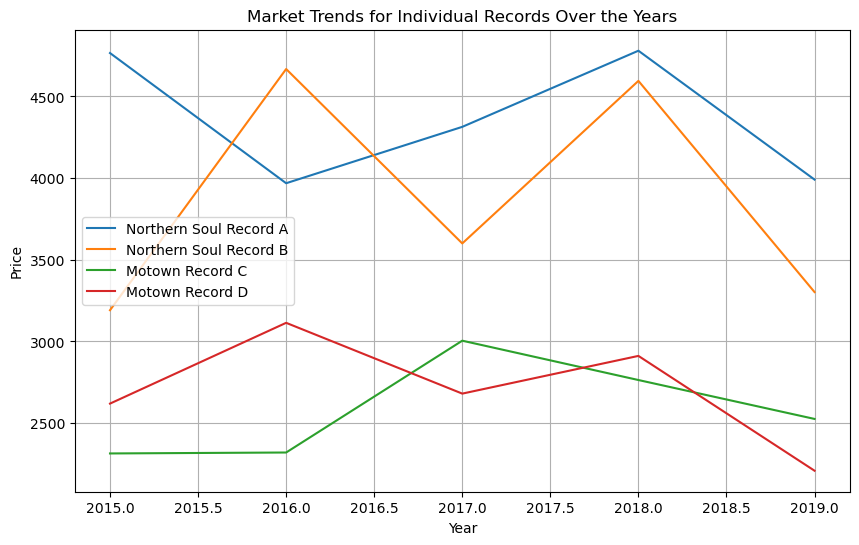

In [32]:
# Separate records by genre and label.
northern_soul_record_a = filtered_records[(filtered_records['Genre'] == 'Northern Soul') & (filtered_records['Record Label'] == 'Record A')]
northern_soul_record_b = filtered_records[(filtered_records['Genre'] == 'Northern Soul') & (filtered_records['Record Label'] == 'Record B')]
motown_record_c = filtered_records[(filtered_records['Genre'] == 'Motown') & (filtered_records['Record Label'] == 'Record C')]
motown_record_d = filtered_records[(filtered_records['Genre'] == 'Motown') & (filtered_records['Record Label'] == 'Record D')]

# Plotting.
plt.figure(figsize=(10, 6))

plt.plot(northern_soul_record_a['Year'], northern_soul_record_a['Price'], label='Northern Soul Record A')
plt.plot(northern_soul_record_b['Year'], northern_soul_record_b['Price'], label='Northern Soul Record B')
plt.plot(motown_record_c['Year'], motown_record_c['Price'], label='Motown Record C')
plt.plot(motown_record_d['Year'], motown_record_d['Price'], label='Motown Record D')

plt.title('Market Trends for Individual Records Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

 <div align="justify">

To determine an **IN DEMAND** value for every single record per year and calculate some aggregate metric that represents demand, I pass to focus on the percentage change in record prices. The stand point for comparison is the first year when the auctions' results were collected: 2015. This operation is the key part of the present work and its aim is to provide guidance for determining and predicting prices for the next years ahead.

I have hence added to the DataFrame a new column called *PercentageChange* and then I have removed the records from the first year (2015) as there is no previous year for comparison. Finally, grouping each record according to the *Record Label* category through the **.pct_change()**, I have calculated the *mean* change for each 'Year' and 'Record Label' and multiply it by 100 to express the percentage change of the same mean rather than a fraction. The result is assigned to the new column *PercentageChange*.

As shown by the resulting graph, analysing the trends in the resulting *demand_df* DataFrame can provide insights into the demand patterns over the years. However, predicting future prices involves far more complex modelling or even machine learning models for forecasting.

 </div>

In [24]:
# Add a new column for labeling records.
filtered_records['Record Label'] = ""

# Create a dictionary to keep track of record labels.
record_labels = {'Northern Soul': ['Record A', 'Record B'], 'Motown': ['Record C', 'Record D']}

# Iterate through the filtered records and assign record labels.
for genre, labels in record_labels.items():
    genre_records = filtered_records[filtered_records['Genre'] == genre]
    years = genre_records['Year'].unique()
    
    for year in years:
        year_records = genre_records[genre_records['Year'] == year]
        num_records = len(year_records)
        labels_per_year = labels[:num_records]
        filtered_records.loc[year_records.index, 'Record Label'] = labels_per_year

# Calculate the percentage change for each record label compared to the baseline year (2015).
baseline_prices = filtered_records[filtered_records['Year'] == 2015].groupby('Record Label')['Price'].mean()
filtered_records['PercentageChange'] = (
    filtered_records.groupby('Record Label')['Price'].pct_change() * 100
)

# Display the result.
print(filtered_records[['Price', 'Genre', 'Year', 'Record Label', 'PercentageChange']])



       Price          Genre  Year Record Label  PercentageChange
416  2314.50         Motown  2015     Record C               NaN
417  2619.61         Motown  2015     Record D               NaN
418  4765.52  Northern Soul  2015     Record A               NaN
419  3191.26  Northern Soul  2015     Record B               NaN
436  2320.27         Motown  2016     Record C          0.249298
437  3114.06         Motown  2016     Record D         18.874947
438  3968.62  Northern Soul  2016     Record A        -16.722205
439  4667.61  Northern Soul  2016     Record B         46.262291
456  3004.73         Motown  2017     Record C         29.499153
457  2680.77         Motown  2017     Record D        -13.913990
458  4313.68  Northern Soul  2017     Record A          8.694710
459  3600.11  Northern Soul  2017     Record B        -22.870377
476  2763.95         Motown  2018     Record C         -8.013366
477  2911.60         Motown  2018     Record D          8.610586
478  4779.69  Northern So

/var/folders/cx/vlt1678502q06cnlvdssdz_c0000gn/T/ipykernel_3875/3798157372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_records['Record Label'] = ""
/var/folders/cx/vlt1678502q06cnlvdssdz_c0000gn/T/ipykernel_3875/3798157372.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_records['PercentageChange'] = (


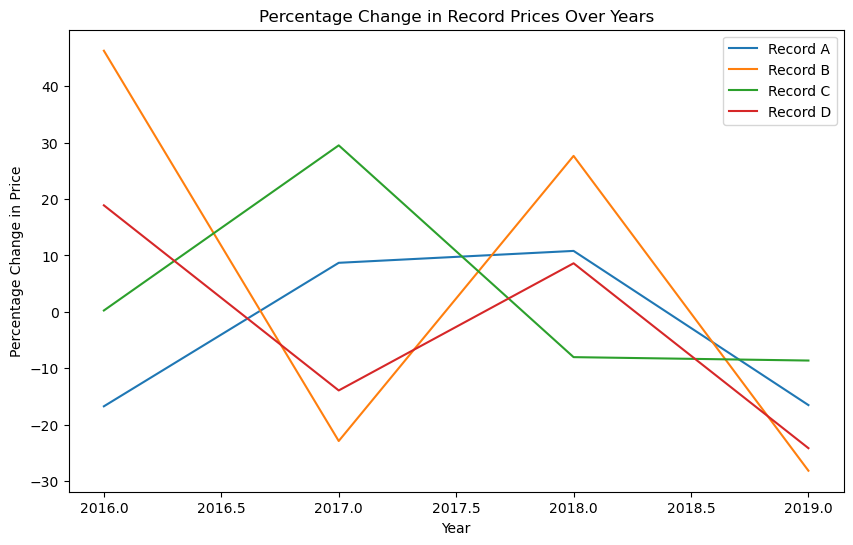

In [25]:
# Generating an empty plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Iterating percentage change colum and distributing the values per year.
for label, group in filtered_records.groupby('Record Label'):
    ax.plot(group['Year'], group['PercentageChange'], label=label)

# Showing the plot.
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Price')
ax.legend()
plt.title('Percentage Change in Record Prices Over Years')
plt.show();


 <div align="justify">

### CONCLUSION

For vinyl enthusiasts and music lovers, determining the value of records can be a tricky yet fascinating journey. Often, record prices are subject to long and extremely detailed debates. For this reason, my analysis aims to provide a user-friendly guide, combining accessible knowledge, keen observation, and personal taste. Delving into market trends, this approach simplifies the process for both seasoned collectors and casual music fans. Just focus on Vinyl Scarcity, Record Condition, Genre, and Auction Results – these four key factors form the basis for evaluating a record's worth.  

Starting from 2015 and calculating the percentage change in record prices, my work is a useful reference, offering a clearer view of market trends. Analysing these trends annually helps spot changes in demand or potential shifts in consumer preferences, even though predicting them with absolute certainty is an impossible task. As a matter of fact, to navigate these unpredictable waters more reliably, we can only focus on gathering information about vinyl scarcity, assessing record conditions, and keeping an eye on auction results.  

My analysis essentially offers only a closer inspection of the aggregated data: predicting future prices requires far more sophisticated modelling techniques, such as machine learning, time series forecasting or regression models. These more sophisticated models take into account various features such as economic indicators, music industry trends and external factors affecting consumer behaviour. This guide, however, can be regarded as the groundwork for a more comprehensive and predictive understanding of market dynamics, but, nonetheless, to determine the unpredictable “IN DEMAND" factor, enthusiasts should continuously stay informed about current trends and shifts in music culture. While the importance of combining tangible factors with subjective elements, the need for ongoing observation and engagement with the music community cannot be stressed enough, the present study offers a practical and accessible starting point for music lovers to confidently assign realistic values to their collections or desired records.

 </div>

***

### End